# Visualizing Earnings Based On College Majors

This project was completed as a part of the Data Analyst Dataquest series on 07/16/19

**Goal:** Our aim in this project is to determine the effect of a major on a recently graduated student's life, and what the distribution of majors is relation to gender and in relation to other majors. We will construct visual plots using matplotlib to convey and more easily interpret the data. Below are some of the columns we will be exploring and their corresponding definitions as taken from the [538 github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors) that is the cleaned version of the dataset from the [US Census](https://www.census.gov/programs-surveys/acs/data/pums.html).

| Column's Name | Column Definitions                                                       |
|-------------|----------------------------------------------------------------------------|
| Sample_size | Sample size (unweighted) of full-time, year-round ONLY (used for earnings) |
| Median      | Median earnings of full-time, year-round workers                           |
| Employed    | Number employed (ESR == 1 or 2)                                            |
| Full_time   | Employed 35 hours or more                                                  |
| ShareWomen  | Women as share of total                                                    |
| Unemployment_rate | Unemployed / (Unemployed + Employed)                                 |
| Men | Male Graduates                                                                     |
| Women | Female Graduates                                                                 |



In [219]:
import pandas as pd
import matplotlib.pyplot as plt
"""
Line magic function. With this backend, the output of plotting commands is displayed 
inline within frontends like the Jupyter notebook, directly below the code cell that 
produced it. The resulting plots will then also be stored in the notebook document.
""" 
%matplotlib inline

recent_grads = pd.read_csv("/Users/pgladkevich/Desktop/coding/projects/datasets/recent-grads.csv")
# Return first row formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [220]:
# The first and last couple of rows printed to get a general sense of the format

print(recent_grads.head(3))
print("\n")
print("-------------------------------------------------------------------------------")
print("\n")
print(recent_grads.tail(3))

   Rank  Major_code                           Major   Total     Men  Women  \
0     1        2419           PETROLEUM ENGINEERING  2339.0  2057.0  282.0   
1     2        2416  MINING AND MINERAL ENGINEERING   756.0   679.0   77.0   
2     3        2415       METALLURGICAL ENGINEERING   856.0   725.0  131.0   

  Major_category  ShareWomen  Sample_size  Employed  ...  Part_time  \
0    Engineering    0.120564           36      1976  ...        270   
1    Engineering    0.101852            7       640  ...        170   
2    Engineering    0.153037            3       648  ...        133   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   
1                   388          85           0.117241   75000  55000   90000   
2                   340          16           0.024096   73000  50000  105000   

   College_jobs  Non_college_jobs  Low_wage_jobs  
0          1534           

In [221]:
# Summary statistics for numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [222]:
# Dropping any rows with missing values and comparing the dataset rowcount before and after 
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count, cleaned_data_count)



173 172


# Pandas, Scatter Plots

Only one row was dropped as a result of the cleaning operation. Now we will proceed to explore the relationships between: major popularity and median salary, gender preference and median salary, and the ratio of full-time employees to median salary in each major. We will visualize these relationships using scatter plots and draw our qualitative conclusions based off of the observed patterns.

Text(0.5, 1.0, 'Median Salary vs. People Polled from Major')

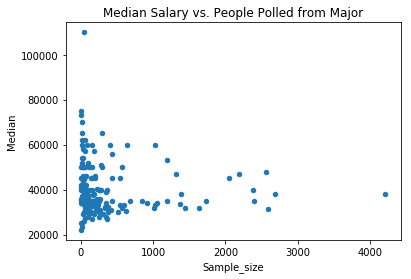

In [223]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title("Median Salary vs. People Polled from Major")

There appears to be a slight negative association between the number of people polled and the median salary, as there are more dots below the mean the closer the x-axis gets to zero. This relationship does not appear to be linear. The spread increases as the sample size decreases, which is to be expected as the majors with lots of people polled are likely to have median salaries closer to that of the sample median. 

Text(0.5, 1.0, 'Unemployment Rate vs. People Polled from Major')

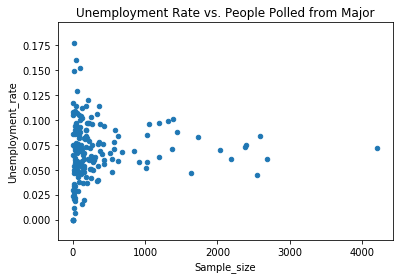

In [224]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title("Unemployment Rate vs. People Polled from Major")

There appears to be a fairly linear relationship between the unemployment rate and the sample size, but as the number of people polled in a major decreases below approximately 500 the relationship is lost.

Text(0.5, 1.0, 'Median Salary vs. Number of Full-time Workers')

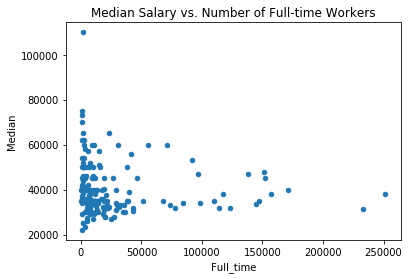

In [225]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title("Median Salary vs. Number of Full-time Workers")

There appears to be a slight negative correlation for majors above 25,000 Full-time employees, but again the variation increases drastically below this threshold. It is possible that lucrative consulting jobs are skewing the data. 

Text(0.5, 1.0, 'Percentage of Women vs. Unemployment Rate ')

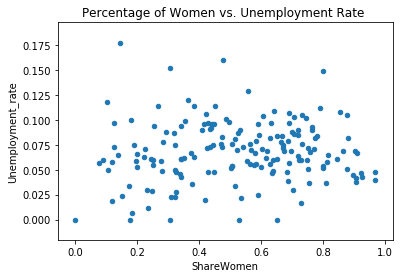

In [226]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title("Percentage of Women vs. Unemployment Rate ")

There is no observable linear or non-linear relationship between the percentage of women and the unemployment rate. There is a single outlier where there are 0 women and 0 unemployed individuals, as well as a few other majors where unemployment is at 0. These majors may have had very few people polled.

Text(0.5, 1.0, 'Number of Men vs. Median Salary ')

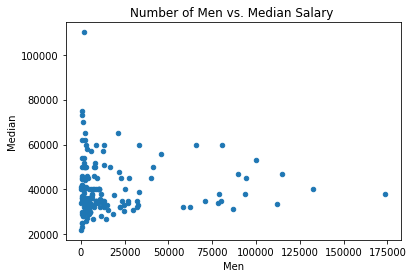

In [227]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title("Number of Men vs. Median Salary ")

Text(0.5, 1.0, 'Number of Women vs. Median Salary')

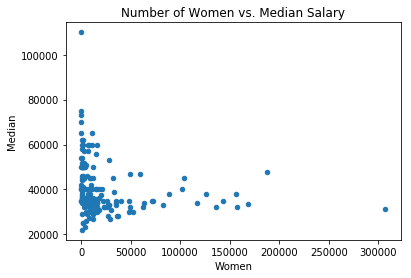

In [228]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_title("Number of Women vs. Median Salary")

I chose to look at the last two graphs together. Combined they represent the breakdown of median salary by gender. It is possible that women as a whole tend to cluster more into certain majors, while men are more spreadout. The highest number of men in a single major does not exceed 175000 while the highest number of women is 300,000. This explains the distinction between the mean number of men 16723.40 vs women 22646.67. The women have an outlier value that pulls the mean to the right, so despite an approximately average number of percentage of women at 52% the means are very different. 

# Pandas, Histograms

Now we will use histogram plots to look at the relationships between majors and percentage gender, as well as, the most common median salary range.

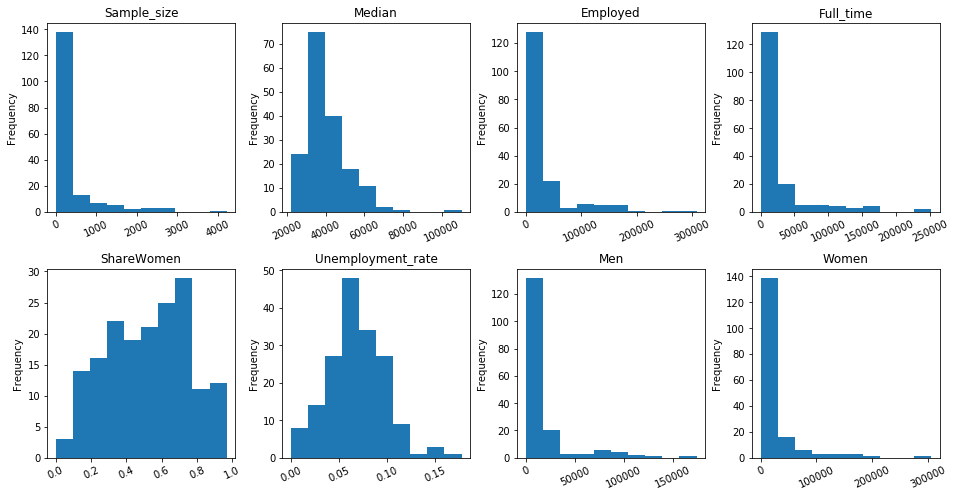

In [229]:
columns =  ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(16,8))

for index in range(0,8):
    ax = fig.add_subplot(2,4,index+1)
    ax = recent_grads[columns[index]].plot(kind='hist', rot=25)
    ax.set_title(str(columns[index]))

fig.subplots_adjust(hspace=.3,wspace=.25)


From this we can see that the sample size on average was very small, with a few exceptions as it is very leftward skewed. The median salary is clustered about the median of 36,000 and is also rightward skewed, with the very high salaries likely driving up the means. The number of Employed workers and full-time workers is similar to the Sample_size graph. The percentage of women is a slightly different graph than the previous ones. Here on the x-axis we see the percentage of women, while on the y-axis we have the number of majors that had this percentage. There are more majors with higher percentages of women than not. For unemployment we have a fairly normal distriubtion so there are roughly as many majors with low unemployment as high unemployment. The last two graphs are again severely skewed showing that the vast majority of the 172 majors do not have a lot of people in them, but there are an elite few that contain the lion's share of the populace.

# Pandas, Scatter Matrix Plot

We will repeat the visualizations of the previous steps with the technique of side-by-side histogram and scatter plot comparison

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1235126d8>,
      dtype=object)

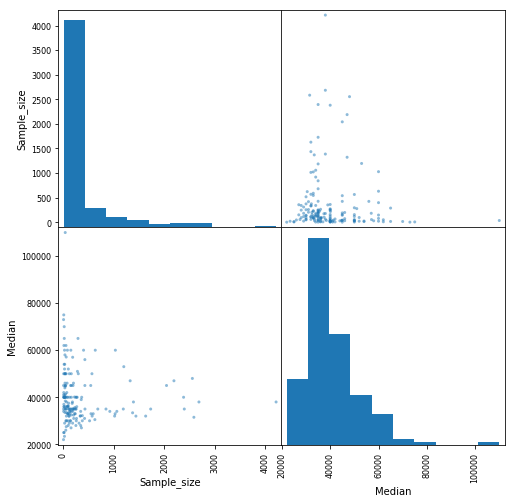

In [230]:
from pandas.plotting import scatter_matrix 

scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123f0f9e8>,
      dtype=object)

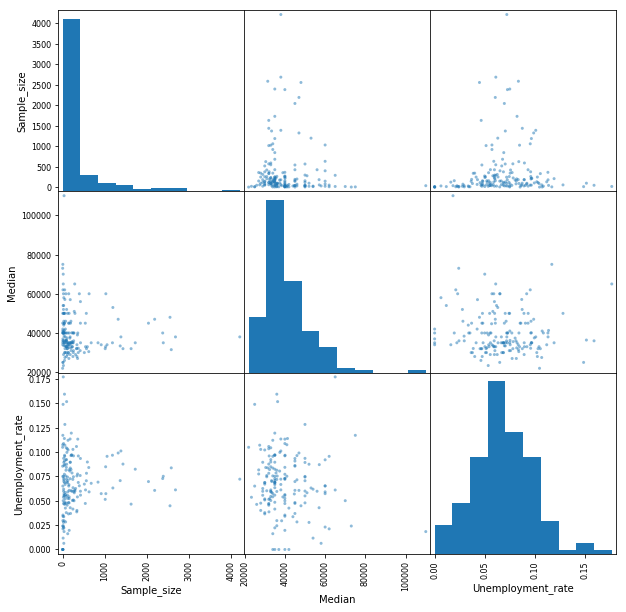

In [231]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

From the above graph we can observe that there is no relationship between the median salary and the unemployment rate. The same observations from before are present in the graphs related to sample_size as there is a much greater spread at the lower end of the spectrum.

# Pandas, Bar Plots

We will compare the first and last ten majors of the ShareWomen and Unemployment columns using the barplot technique.

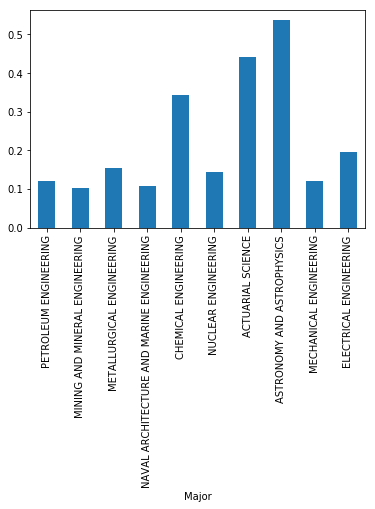

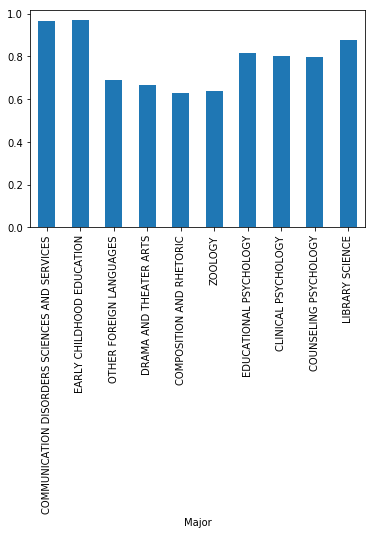

In [232]:
recent_grads[:10].plot.bar(x="Major",y="ShareWomen", legend=False)
recent_grads[-10:].plot.bar(x="Major",y="ShareWomen", legend=False)

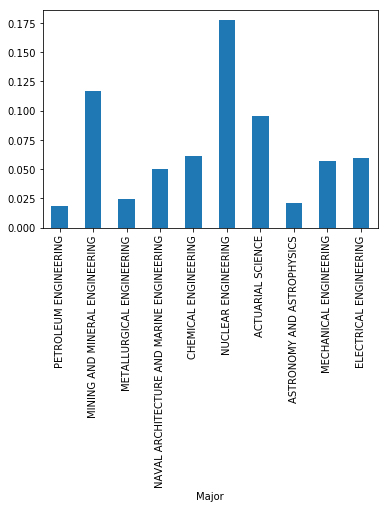

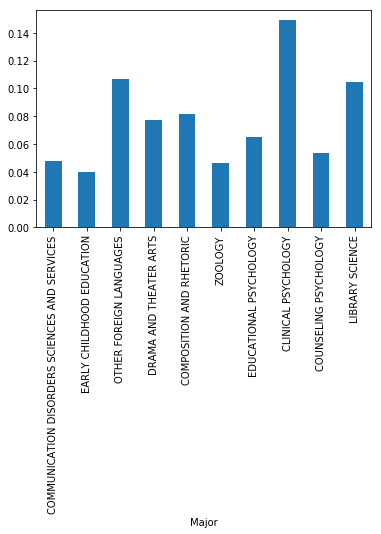

In [233]:
recent_grads[:10].plot.bar(x="Major",y="Unemployment_rate", legend=False)
recent_grads[-10:].plot.bar(x="Major",y="Unemployment_rate", legend=False)

# Conclusion

The barplot analysis would be useful to us if we were attempting to compare majors relatively quickly and then do a more in-depth analysis of relationships with the scatter-plot and histogram techniques. This project was geared towards practicing generating these types of plots. Some additional graphs I generated for fun are below.

In [234]:
# How many different major categories are there
cat = recent_grads["Major_category"].unique()
print(cat)
print(cat.size)

['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Industrial Arts & Consumer Services' 'Arts'
 'Health' 'Social Science' 'Biology & Life Science' 'Education'
 'Agriculture & Natural Resources' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary']
16


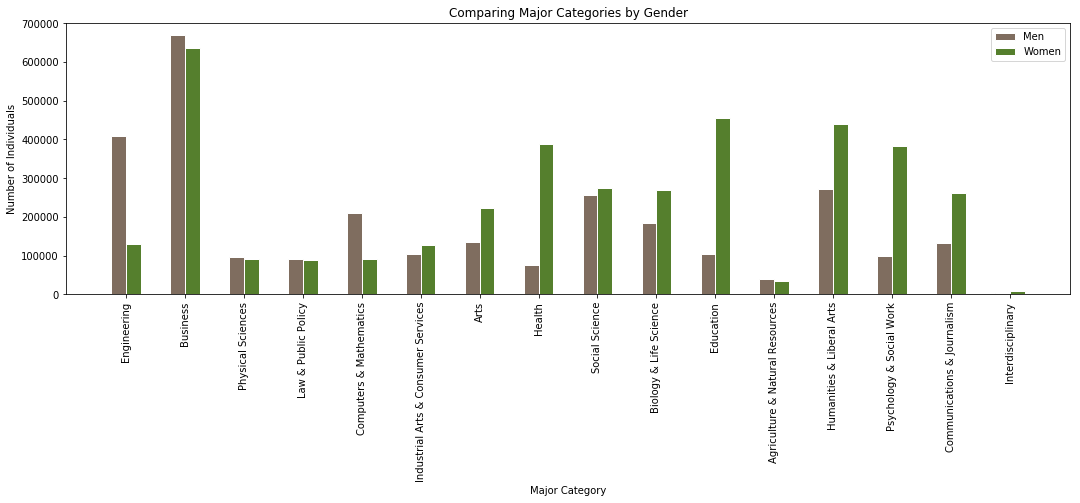

In [235]:
import numpy as np

f, ax = plt.subplots(figsize=(18,5))
bar_men = []
bar_women = []
barwidth = .25

for c in cat:
    r1 = np.arange(len(cat))
    r2 = np.arange(len(cat))
    num_men = recent_grads[recent_grads["Major_category"] == c]["Men"].sum()
    num_women = recent_grads[recent_grads["Major_category"] == c]["Women"].sum()
    
    bar_men.append(int(num_men))
    bar_women.append(int(num_women))

# Set position of bar on X axis
r1 = np.arange(len(bar_men))
r2 = [x + barwidth for x in r1]

# Plot the graph
plt.bar(r1, bar_men, color='#7f6d5f', width=barwidth, edgecolor='white', label='Men')
plt.bar(r2, bar_women, color='#557f2d', width=barwidth, edgecolor='white', label='Women')

# Add labels on the middle of the group bars and titles
plt.xlabel('Major Category')
plt.xticks([(r+.5*barwidth) for r in range(len(bar_men))], cat, rotation=90)
plt.ylabel('Number of Individuals')
plt.title('Comparing Major Categories by Gender')

# Create legend & Show graphic
plt.legend()
plt.show()


    

From the above graph we can tell that the ratio of men to women is significantly below 50% for nearly all major categories ot her than Engineering and Computer & Mathematics, while it is practically equal for Physical Sciences, Law & Public Policy, and Social Science. It appear that there were a much larger proportion of men particularly in engineering.

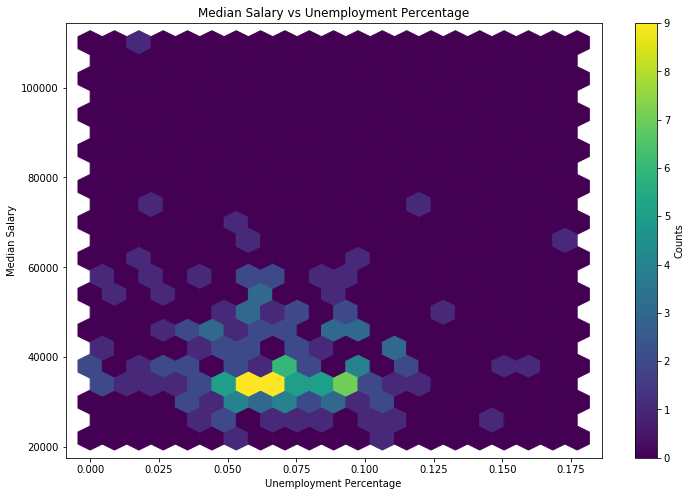

In [236]:
fig, ax = plt.subplots(figsize=(12,8))

xmin = recent_grads['Unemployment_rate'].min()
xmax = recent_grads['Unemployment_rate'].max()
ymin = recent_grads['Median'].min()
ymax = recent_grads['Median'].max()

graph = ax.hexbin(x=recent_grads['Unemployment_rate'], y=recent_grads['Median'], gridsize=20)
ax.set_title('Median Salary vs Unemployment Percentage')
cb = fig.colorbar(graph, ax=ax)
cb.set_label('Counts')
ax.set_xlabel('Unemployment Percentage')
ax.set_ylabel('Median Salary')

plt.show()

As we can tell from the above plot there are many more majors that overlap in the average salary range of 36,000 and the unemployment percentage is also clustered about 6-7%.  